### Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


In [23]:
# Import Libraries
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configure pandas to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [14]:
# Load the dataset
books_data = pd.read_csv('book.csv')

# Display the first few rows of the dataset to understand its structure
books_data.head()

# Display the shape of the dataset
books_data.shape

# Display information about the dataset
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [15]:
#Descriptive Statistics
# Calculate the sum of each book category to understand their distribution
category_counts = books_data.sum()

# Display the counts of each book category
category_counts

# Print the unique book categories and their count
print('Unique book categories:', books_data.columns.tolist())
print('Number of unique book categories:', len(books_data.columns))

Unique book categories: ['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence']
Number of unique book categories: 11


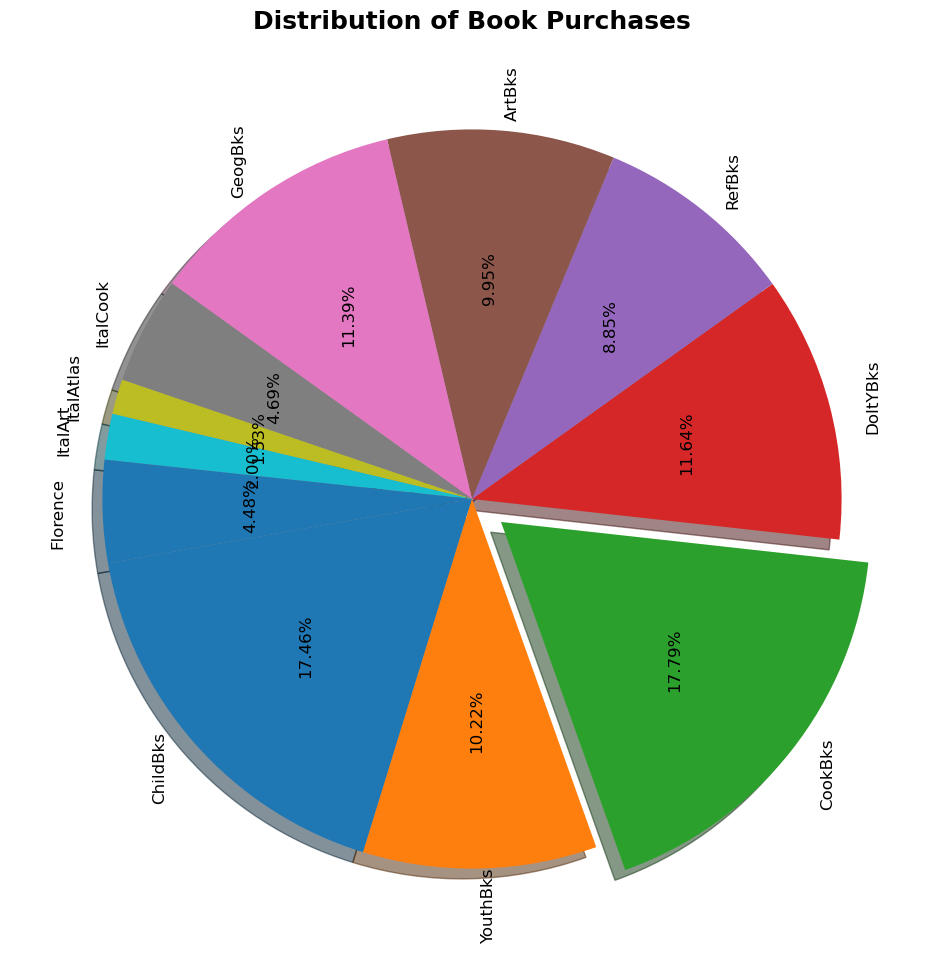

In [16]:
#Data Visualization - Pie Chart
# Visualize the distribution of book purchases using a pie chart
plt.figure(figsize=(12, 12))
plt.pie(category_counts, labels=books_data.columns, explode=[0.1 if i == 2 else 0 for i in range(len(books_data.columns))],
      autopct='%.2f%%', shadow=True, startangle=190, textprops={'size': 'large', 'rotation': 'vertical', 'color': 'black'})
plt.title("Distribution of Book Purchases", fontsize=18, fontweight='bold')
plt.show()

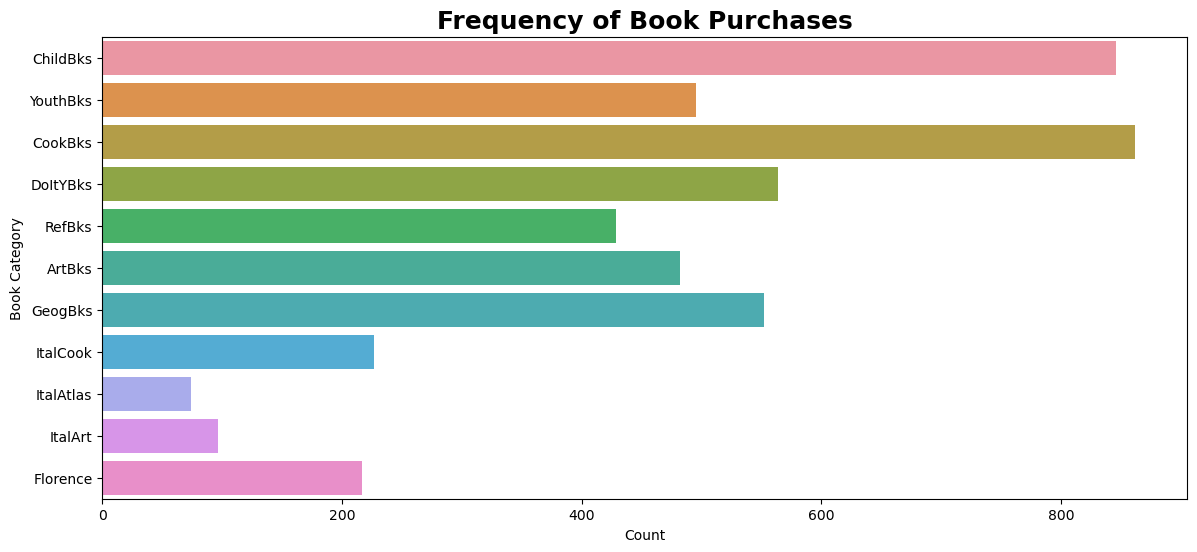

In [17]:
#Data Visualization - Bar Plot
# Create a bar plot to show the frequency of book purchases
plt.figure(figsize=(14, 6))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Frequency of Book Purchases', fontsize=18, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Book Category')
plt.show()

In [18]:
#Calculate Support Values
# Calculate the support for each book category
support_values = books_data.sum() / len(books_data)

# Display support values
support_values.sort_values(ascending=False)

CookBks      0.4310
ChildBks     0.4230
DoItYBks     0.2820
GeogBks      0.2760
YouthBks     0.2475
ArtBks       0.2410
RefBks       0.2145
ItalCook     0.1135
Florence     0.1085
ItalArt      0.0485
ItalAtlas    0.0370
dtype: float64

In [19]:
#Generate Frequent Itemsets
# Generate frequent itemsets with a minimum support of 10%
frequent_itemsets = apriori(books_data, min_support=0.1, use_colnames=True)

# Add a column for the length of each itemset
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Display the frequent itemsets
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(ChildBks, YouthBks)",2


In [20]:
#Generate Association Rules
# Generate association rules with a minimum confidence of 30%
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)

# Display the association rules
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
69,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
73,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
77,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
76,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
...,...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


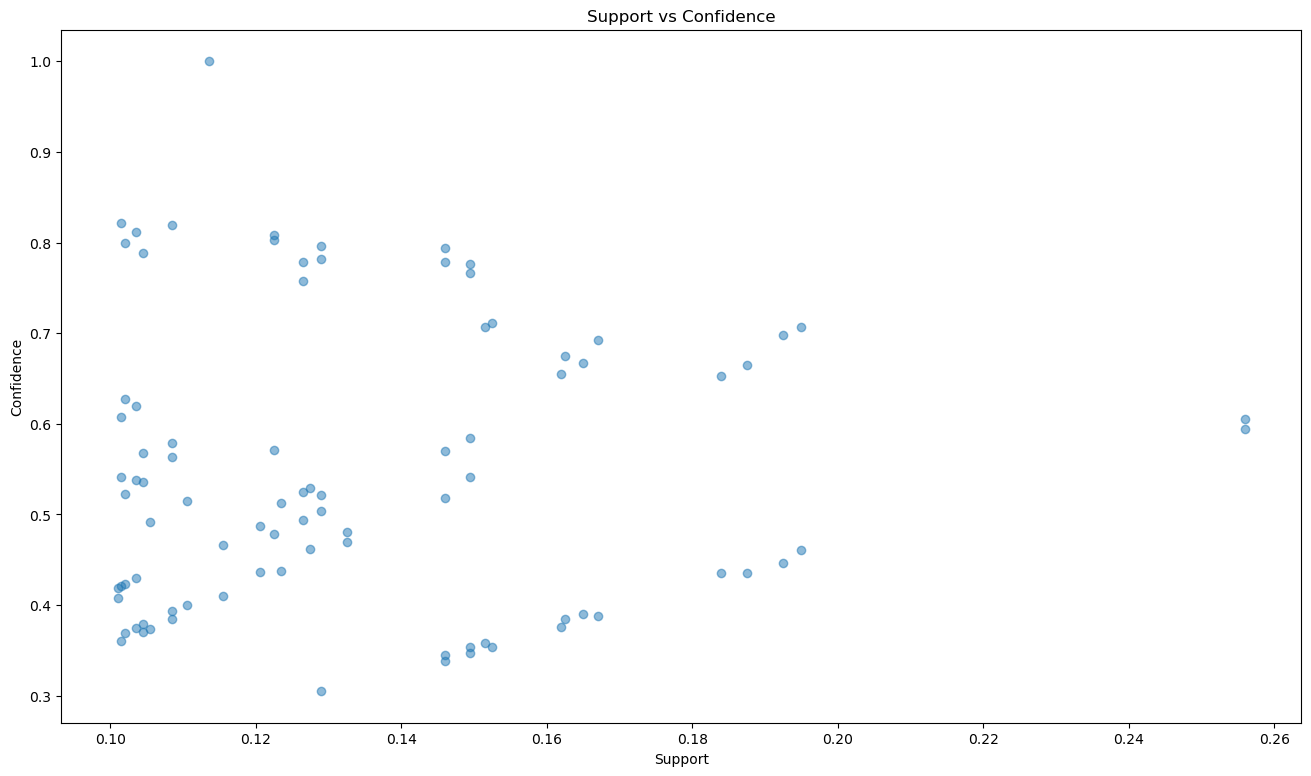

In [21]:
#Visualize Association Rules
# Visualize the association rules using a scatter plot
plt.figure(figsize=(16, 9))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

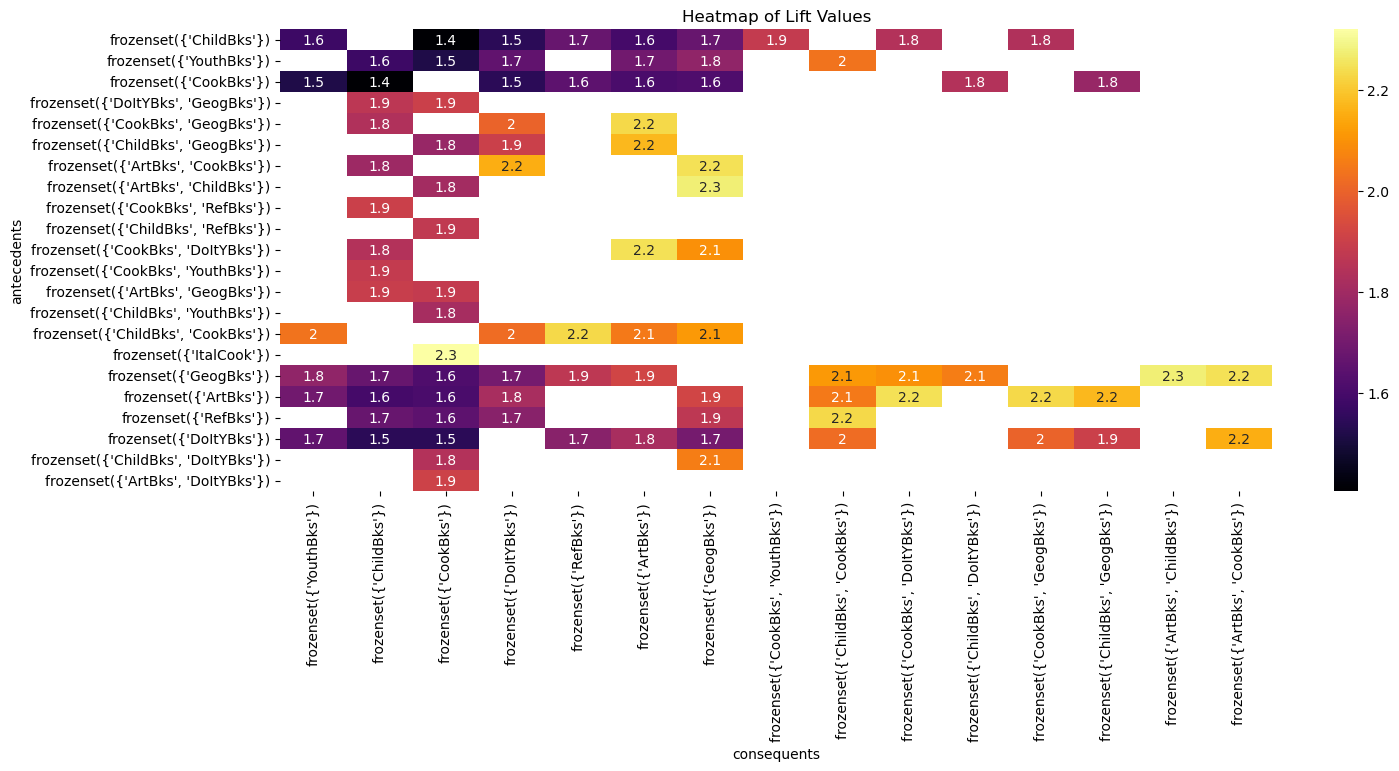

In [24]:
#Heatmap of Lift Values
# Create a pivot table for lift values
lift_matrix = rules.pivot(index='antecedents', columns='consequents', values='lift')
lift_matrix 
# Visualize the lift values using a heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(lift_matrix, annot=True, cmap='inferno')
plt.title('Heatmap of Lift Values')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [25]:
lift_matrix

consequents,(YouthBks),(ChildBks),(CookBks),(DoItYBks),(RefBks),(ArtBks),(GeogBks),"(CookBks, YouthBks)","(ChildBks, CookBks)","(CookBks, DoItYBks)","(ChildBks, DoItYBks)","(CookBks, GeogBks)","(ChildBks, GeogBks)","(ArtBks, ChildBks)","(ArtBks, CookBks)"
antecedents,,,,,,,,,,,,,,,
(ChildBks),1.576044,NaN,1.404179,1.542511,1.669725,1.594028,1.670264,1.882497,NaN,1.840820,NaN,1.835989,NaN,NaN,NaN
(YouthBks),NaN,1.576044,1.518667,1.654846,NaN,1.693281,1.764017,NaN,2.035985,NaN,NaN,NaN,NaN,NaN,NaN
(CookBks),1.518667,1.404179,NaN,1.542677,1.649549,1.607763,1.618245,NaN,NaN,NaN,1.841017,NaN,1.778809,NaN,NaN
"(DoItYBks, GeogBks)",NaN,1.864490,1.899926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(CookBks, GeogBks)",NaN,1.835989,NaN,1.998711,NaN,2.230964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ChildBks, GeogBks)",NaN,NaN,1.778809,1.900346,NaN,2.170444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ArtBks, CookBks)",NaN,1.790745,NaN,2.155264,NaN,NaN,2.245509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ArtBks, ChildBks)",NaN,NaN,1.806175,NaN,NaN,NaN,2.274247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(CookBks, RefBks)",NaN,1.899004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
